# Biomolecular modeling laboratory


In [5]:
import numpy as np
import pandas as pd


In [6]:

reference_sequence = 'KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKKIVSDGNGMNAWVAWRNRCKGTDVQAWIRGCRL'



In [19]:
# my idea here is to add to this dataframe also the result we got from other methods like 
# RMSF analysis, 

from code.aligments import get_frequencies

most_common, frequencies = get_frequencies('data/seqdump_5000.txt')
positions = range(129)

our_sequence = []
difference = []
for idx, elem in enumerate(reference_sequence):
    our_sequence.append(elem)
    difference.append(elem == most_common[idx])

# our protein is equal to our reference amminoacid

df = pd.DataFrame({
    'positions': positions,
    '2LYZ_sequence': our_sequence, 
    'most_common_amminoacid': most_common,
    'frequency': frequencies   
})

df


Found 5262 aligned sequences


,positions,2LYZ_sequence,most_common_amminoacid,frequency
0,0,K,K,0.602052
1,1,V,V,0.379704
2,2,F,F,0.300266
3,3,G,E,0.239073
4,4,R,R,0.525086
...,...,...,...,...
124,124,R,no amminoacid here,0.594261
125,125,G,no amminoacid here,0.628658
126,126,C,no amminoacid here,0.796085
127,127,R,no amminoacid here,0.826112


In [20]:
rmsf_df = pd.read_csv('data/rmsf.dat')
df["rmsf"] = rmsf_df["rmsf"]


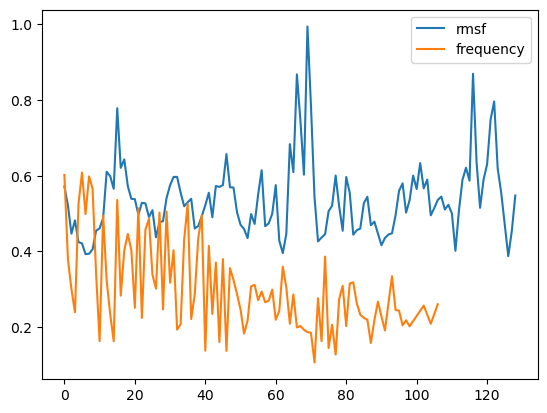

In [21]:
import matplotlib.pyplot as plt

validRows = df["most_common_amminoacid"]!='no amminoacid here'

plt.plot(df["positions"], df["rmsf"])
plt.plot(df[validRows]["positions"], df[validRows]["frequency"])
plt.legend(['rmsf', 'frequency'])
plt.show()

In [32]:
position2Change = np.argmin(frequencies)
print(f'The position that most of often changes in similar protein is: {position2Change} (remember we start counting at zero in python!)')
print(f'At such position we have a { reference_sequence[position2Change] } amino acid')


The position that most of often changes in similar protein is: 71 (remember we start counting at zero in python!)
At such position we have a S amino acid
